## SUPPORT VECTOR MACHINES CHALLENGE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
df = pd.read_csv("C:/Users/ushai/Dropbox/Data Science/Datasets/epicurious dataset/epi_r.csv")

In [3]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# running describe() function on 'rating' column
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [5]:
# Obtain value_counts() for 'rating' column
df.rating.value_counts()

4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64

In [6]:
df.shape

(20052, 680)

In [7]:
# Counting Null Values 
null_count = df.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
df.dtypes.head()

title        object
rating      float64
calories    float64
protein     float64
fat         float64
dtype: object

### MULTIPLE CLASSIFICATION PROBLEM

In [9]:
# Coverting data in to a multiple classification problem
df['rating_integer'] = df.rating.astype(int)

In [10]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating_integer
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


### PERCENT OF RATINGS

In [11]:
df.rating_integer.value_counts()

4    8019
3    6658
5    2719
0    1836
2     532
1     288
Name: rating_integer, dtype: int64

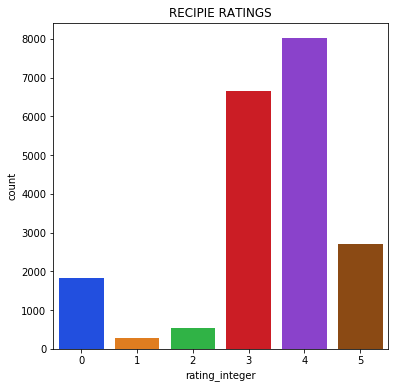

percentage of Worst ratings: 9.16
percentage of Bad ratings: 1.44
percentage of Low ratings: 2.65
percentage of Medium ratings: 33.2
percentage of High ratings: 39.99


<Figure size 432x288 with 0 Axes>

In [12]:
# Percentage of all ratings

plt.figure(figsize=(6,6))
plt.title("RECIPIE RATINGS")
sns.countplot(x='rating_integer', data=df, palette = 'bright')
plt.show()
plt.savefig('count')

Worst = df[df['rating_integer'] == 0].shape[0]
Bad = df[df['rating_integer'] == 1].shape[0]
Low = df[df['rating_integer'] == 2].shape[0]
Medium = df[df['rating_integer'] == 3].shape[0]
High = df[df['rating_integer'] == 4].shape[0]
V_High = df[df['rating_integer'] == 5].shape[0]

pct_Worst = (Worst/(Worst + Bad + Low + Medium + High + V_High))*100
pct_Bad = (Bad/(Worst + Bad + Low + Medium + High + V_High))*100
pct_Low = (Low/(Worst + Bad + Low + Medium + High + V_High))*100
pct_Medium = (Medium/(Worst + Bad + Low + Medium + High + V_High))*100
pct_High = (High/(Worst + Bad + Low + Medium + High + V_High))*100
pct_V_High = (V_High/(Worst + Bad + Low + Medium + High + V_High))*100

print("percentage of Worst ratings:", np.round(pct_Worst,2))
print("percentage of Bad ratings:", np.round(pct_Bad,2))
print("percentage of Low ratings:", np.round(pct_Low,2))
print("percentage of Medium ratings:", np.round(pct_Medium,2))
print("percentage of High ratings:", np.round(pct_High,2))

### RIDGE REGRESSION - FEATURE SELECTION

In [13]:
# Choosing a model
from sklearn import linear_model

In [14]:
# As λ gets larger, the penalty for coefficient size also gets larger (Higher λ = lowered coefficent)
# and the solution that minimizes the cost function will by necessity have smaller coefficient estimates. 
# Regularization based on the sum of the squared weights is also called "L2 regularization".

ridge = linear_model.RidgeClassifier(alpha=5, fit_intercept=False) 

In [15]:
# Values for Features and Target
X = df.drop(['rating','rating_integer','title','calories','protein','fat','sodium'],1)
y = df.rating_integer

In [16]:
# Fitting the model
ridge.fit(X, y)

RidgeClassifier(alpha=5, class_weight=None, copy_X=True, fit_intercept=False,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [17]:
# K fold Cross Validation score
scores_ridge = cross_val_score(ridge, X, y, cv=5)
print(scores_ridge)

[0.43533516 0.44890329 0.47020693 0.4639561  0.47317195]


In [18]:
# Mean K fold Cross Validation score
print(scores_ridge.mean())

0.45831468593280117


In [19]:
# R Square
R_Square = (ridge.score(X, y))
print ("R Square:{}".format(R_Square))

R Square:0.49630959505286254


In [20]:
# Regression Coefficents - Ridge regression
print(ridge.coef_, ridge.intercept_)

[[-0.21064891 -0.12130118 -0.34750554 ...  0.44010107 -0.48668359
  -0.10776767]
 [-0.17199264 -0.0844958  -0.31132339 ... -0.22306446 -0.00201854
  -0.20376952]
 [-0.17745451 -0.08615859 -0.31113863 ... -0.24335898 -0.09286336
  -0.18852248]
 [ 0.3493381  -0.11706434 -0.38280339 ... -0.37808677  0.16578144
  -0.20211602]
 [-0.39517187 -0.10812535  0.19508708 ... -0.17958311  0.04698304
  -0.13949427]
 [-0.17237211  0.19568455 -0.02717201 ... -0.28026213  0.15679552
   0.03548977]] 0.0


In [21]:
# Creating dataframe for Coefficients
coeff_ridge = pd.DataFrame(X.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge.coef_[0])

# Renaming "single Column"
coeff_ridge = coeff_ridge.rename(columns = {0:'Variables'})

# sorting values by 'Coefficient Estimate'
coeff_ridge = coeff_ridge.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)

In [22]:
coeff_ridge.head()

,Variables,Coefficient Estimate
0,leftovers,0.987630
1,pickles,0.561041
2,sardine,0.518373
3,snack,0.440101
4,harpercollins,0.432686


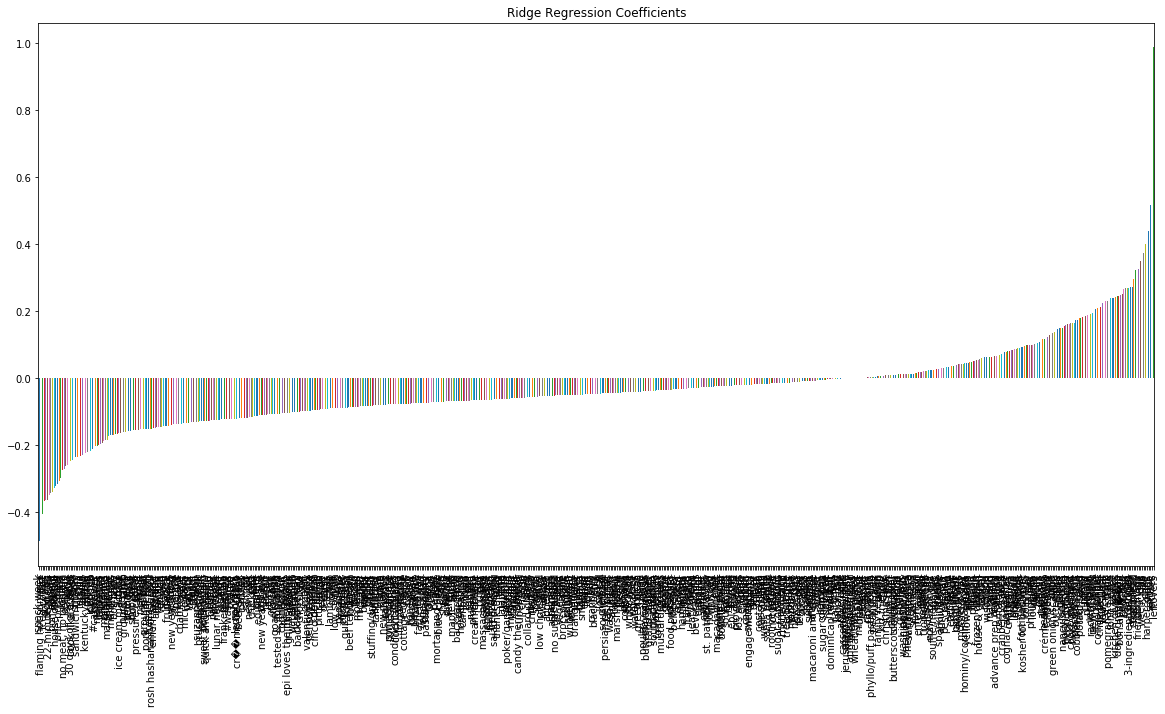

In [23]:
# checking the magnitude of coefficients
plt.figure(figsize=(20,10))
predictors = X.columns
coef = pd.Series(ridge.coef_[0],X.columns).sort_values()
coef.plot(kind='bar', title='Ridge Regression Coefficients')

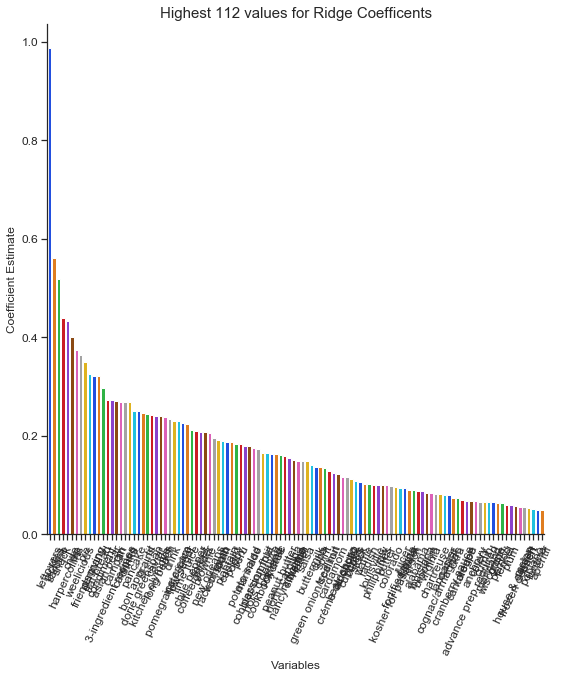

In [24]:
# Highest 112 values for Coefficents
highest = coeff_ridge.nlargest(112, 'Coefficient Estimate')

sns.set(style="ticks")

g = sns.catplot(x="Variables", y="Coefficient Estimate", data=highest,
                   height=8, kind="bar", palette="bright", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=65, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('Highest 112 values for Ridge Coefficents',fontsize=15)
plt.show()

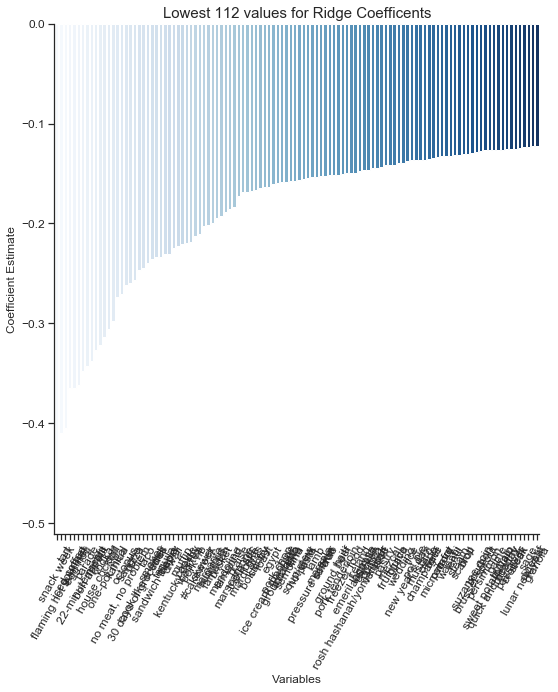

In [25]:
# Lowest 112 values for Coefficents
lowest = coeff_ridge.nsmallest(112, 'Coefficient Estimate')

sns.set(style="ticks")
g = sns.catplot(x="Variables", y="Coefficient Estimate", data=lowest,
                   height=8, kind="bar", palette="Blues", ci=95, legend=False)

g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=60, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('Lowest 112 values for Ridge Coefficents',fontsize=15)
plt.show()

### LASSO REGRESSION - FEATURE SELECTION

In [26]:
# Choosing a model
lassoreg = linear_model.Lasso(alpha=0.1, normalize=False)

In [27]:
# Fitting the model
lassoreg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# K fold Cross Validation score
scores_lasso = cross_val_score(lassoreg, X, y, cv=5)
print(scores_lasso)

[-6.07009944e-04 -4.67476011e-05 -1.26235459e-05 -4.93094657e-04
 -1.41765684e-04]


In [29]:
# Mean, K fold Cross Validation score
print(scores_lasso.mean())

-0.000260248286357756


In [30]:
# Lasso Regression R Square
R_Square = (lassoreg.score(X, y))
print ("R Square:{}".format(R_Square))

R Square:0.0


In [31]:
# Lasso Regression Coefficents
print(lassoreg.coef_, lassoreg.intercept_)

[ 0.  0.  0. -0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0.  0.  0.
 -0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.
  0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.
  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0.  0.
  0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.
  0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0.
 -0.  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0. -0. -0.
 -0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.
 -0.  0. -0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.
  0. -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.  0.  0.
 -0. -0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0

In [32]:
coeff_lasso = pd.DataFrame(X.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lassoreg.coef_)

# Renaming "single Column"
coeff_lasso = coeff_lasso.rename(columns = {0:'Variable'})

# df.sort_values(by=['col1'])
coeff_lasso.sort_values(by=['Coefficient Estimate'],ascending=False).head()

,Variable,Coefficient Estimate
0,#cakeweek,0.0
452,peanut butter,-0.0
444,passion fruit,-0.0
445,passover,0.0
446,pasta,0.0


In [33]:
# Top 15 values for Coefficents
coeff_lasso.nlargest(15, 'Coefficient Estimate')

,Variable,Coefficient Estimate
0,#cakeweek,0.0
1,#wasteless,0.0
2,22-minute meals,0.0
3,3-ingredient recipes,-0.0
4,30 days of groceries,0.0
5,advance prep required,-0.0
6,alabama,-0.0
7,alaska,-0.0
8,alcoholic,-0.0
9,almond,0.0


### RUNNING SVC ON UPDATED FEATURES

Based off Ridge Regression Results as Lasso does not yield significant results.

In [34]:
# Dividing Data in to six tiers
# Combining the first and last tier to form a new DataFrame based off Ridge Regression results
first_tier = coeff_ridge.head(112)
last_tier = coeff_ridge.tail(112)
frames = [first_tier, last_tier]
new_df = pd.concat(frames)

In [35]:
new_df.head()

,Variables,Coefficient Estimate
0,leftovers,0.987630
1,pickles,0.561041
2,sardine,0.518373
3,snack,0.440101
4,harpercollins,0.432686


In [36]:
new_df['Variables'] = new_df['Variables'].astype(str)

In [37]:
Z = df[new_df['Variables']]

In [38]:
Z.head()

,leftovers,pickles,sardine,snack,harpercollins,chile,dip,weelicious,pie,friendsgiving,...,martini,bon appétit,parade,22-minute meals,egg nog,gourmet,iced coffee,tart,flaming hot summer,snack week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Origonal features
X.shape

(20052, 674)

In [40]:
# Updated features
Z.shape

(20052, 224)

In [41]:
# Target Variable
y = df.rating_integer

In [42]:
# Selecting Support Vector Classifier
svc = SVC()

In [43]:
svc.fit(Z, y)

C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
scores_svc = cross_val_score(svc, Z, y, cv=5)
print(scores_svc)

C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.414154   0.41774676 0.41859885 0.41581442 0.41627152]


In [45]:
print(scores_svc.mean())

0.41651711095366356


In [46]:
print(svc.score(Z,y))

0.42215240375024937
